## Traversal Funnels Power Law Fit

In [1]:
from collections import defaultdict

import powerlaw
import pandas as pd
from scipy import stats 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = "/Users/mark/Dropbox/Math/Complex_Systems/research/wikipedia-network/paper/writeup/graphics/"
results_path = "/Users/mark/Desktop/wiki_v4/"


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
#load feeder data
with open(results_path + "feed_count.json") as f:
    feeder_dict = json.load(f)
df = pd.DataFrame(feeder_dict.items())
df.columns = ['article', 'traversal funnels']
df = df.sort(columns=['traversal funnels'], ascending=False)
df['rank'] = np.arange(1, df.shape[0]+1)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


## Estimate Fit

In [4]:
powerlaw_fit_funnels = powerlaw.Fit(df['traversal funnels'], discrete=True)

print "alpha: ", powerlaw_fit_funnels.alpha
print "xmin: ", powerlaw_fit_funnels.xmin
print "gamma: ", 1 / powerlaw_fit_funnels.alpha + 1

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit

alpha:  1.73451540213
xmin:  30.0
gamma:  1.576529905


In [5]:
print "Kolmogorov Distance: ", powerlaw_fit_funnels.D

Kolmogorov Distance:  0.0174111860863


# Visualize Fit

## Log-Log

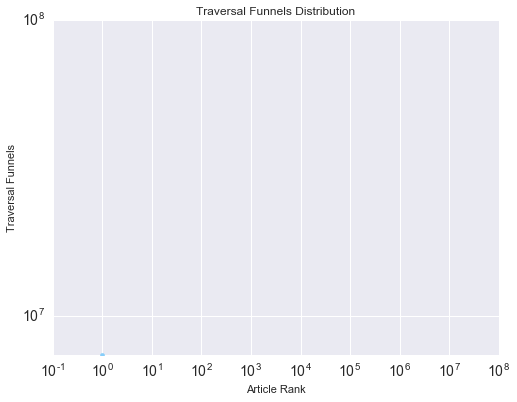

In [12]:
plt.figure(figsize=(8,6))

plt.scatter(df["rank"], df["traversal funnels"],  color="#87CEFA")

plt.tick_params(axis='both', which='major', labelsize=14)

#change axis labeling to 10^#
axis = plt.gca()
axis.set_yscale('log')
axis.set_xscale('log')

#axis limits
axis.set_ylim(top=10**8, bottom=0)

plt.title("Traversal Funnels Distribution")
plt.xlabel("Article Rank")
plt.ylabel("Traversal Funnels")



## Plot against Estimated Power Law 

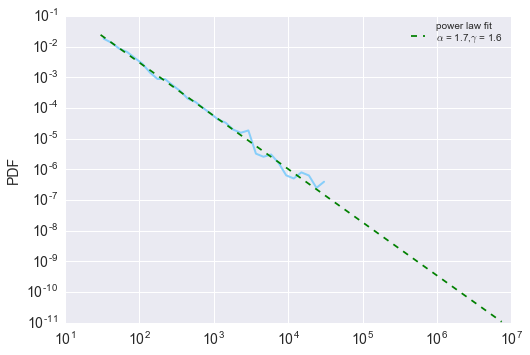

In [7]:
figCCDF = powerlaw_fit_funnels.plot_pdf(color='#87CEFA', linewidth=2)
powerlaw_fit_funnels.power_law.plot_pdf(color='g', linestyle='--', ax=figCCDF, 
                                       label="power law fit\n"+ r'$\alpha$ = 1.7,' + r'$\gamma$ = 1.6')
plt.tick_params(axis='both', which='major', labelsize=14)

plt.ylabel("PDF", fontsize=14)
plt.xlabel("Traversal Funnels", fontsize=14)
plt.legend(numpoints=2)

## Combined Plot

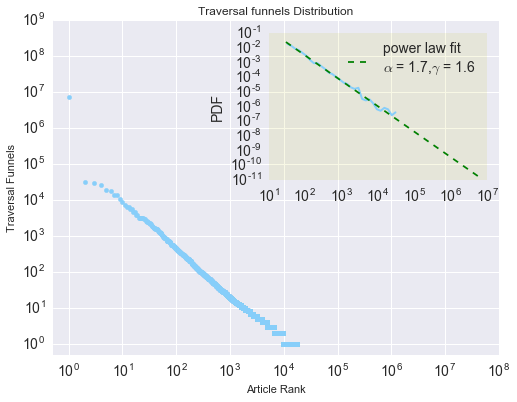

In [9]:
#defaults
sns.set()
plt.figure(figsize=(8,6))
plt.figure(figsize=(8,6))

plt.scatter(df["rank"], df["traversal funnels"],  color="#87CEFA")

plt.tick_params(axis='both', which='major', labelsize=14)

#change axis labeling to 10^#
axis = plt.gca()
axis.set_yscale('log')
axis.set_xscale('log')

#axis limits
axis.set_ylim(bottom=0.5, top=10**9)
axis.set_xlim(left=0.5, right=10**8)

plt.title("Traversal funnels Distribution")
plt.xlabel("Article Rank")
plt.ylabel("Traversal Funnels")


sns.set_style("dark")
#subplot in top corner
a = plt.axes([.50, .53, .38, .34], axisbg='y')


figCCDF = powerlaw_fit_funnels.plot_pdf(color='#87CEFA', linewidth=2)
powerlaw_fit_funnels.power_law.plot_pdf(color='g', linestyle='--', ax=figCCDF, 
                                       label="power law fit\n"+ r'$\alpha$ = 1.7,' + r'$\gamma$ = 1.6')
plt.tick_params(axis='both', which='major', labelsize=14)

a.set_xlim(right=10**7)

plt.ylabel("PDF", fontsize=14)
plt.legend(numpoints=2, fontsize=14)


#transparent
a.patch.set_alpha(0.1)

#reset defaults
sns.set()

## Compare against Alternative Distributions

* R is the loglikelihood ratio
* p is the p-value based on a Kolmogorov-Smirnov Test

In [ ]:
R, p = powerlaw_fit_funnels.distribution_compare('power_law', 'lognormal')
print "R: ", R
print "p: ", p

In [ ]:
R, p = powerlaw_fit_funnels.distribution_compare('power_law', 'exponential')
print "R: ", R
print "p: ", p

In [ ]:
R, p = powerlaw_fit_funnels.distribution_compare('power_law', 'stretched_exponential')
print "R: ", R
print "p: ", p

In [ ]:
R, p = powerlaw_fit_funnels.distribution_compare('power_law', 'truncated_power_law')
print "R: ", R
print "p: ", p